In [1]:
%load_ext autoreload
%autoreload 2

import os

img_dir = "img/ridge/"
if not os.path.isdir(img_dir):
    os.makedirs(img_dir)

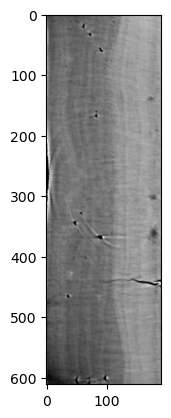

In [2]:
"""
Read in a straightened image

"""
import numpy as np
import matplotlib.pyplot as plt

image = np.load("cropped_image.npy")
plt.imshow(image, cmap="grey")

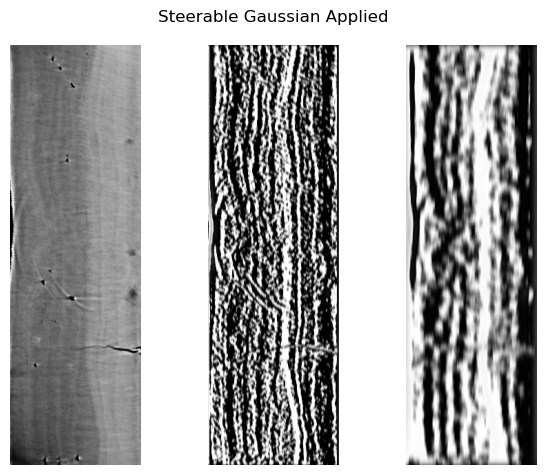

In [3]:
"""
Apply Gaussian filters

"""
from cementum import filter
from skimage import filters

sigma = 1.5
filtered = filter.steerable_filter(image, theta=0, sigma=sigma)
wide_filtered = filter.steerable_filter(image, theta=0, sigma=3 * sigma)

images = [image, filtered, wide_filtered]

# Blur the images a bit since edge detection is sensitive to noise
blur_sigma = 5
images[1:] = [filters.gaussian(img, sigma=blur_sigma) for img in images[1:]]

fig, axes = plt.subplots(1, 3)
axes[0].imshow(image, cmap="grey")
axes[1].imshow(filtered, cmap="grey")
axes[2].imshow(wide_filtered, cmap="grey")

for axis in axes:
    axis.set_axis_off()
fig.suptitle("Steerable Gaussian Applied")

fig.tight_layout()

fig.savefig(f"{img_dir}/filtered.png", bbox_inches="tight")

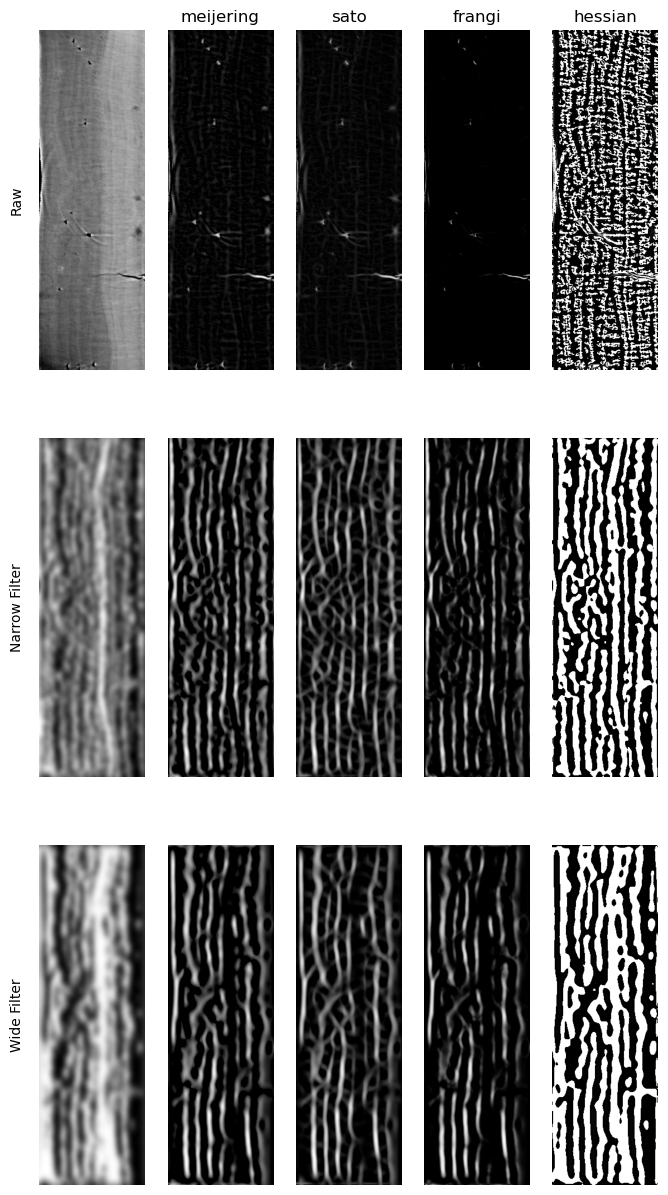

In [4]:
"""
Try several ridge detection methods

"""
from skimage import io, filters, color

# Display the original image and the detected ridges
fig, axes = plt.subplots(3, 5, figsize=(8, 15))

# Instead of turning the whole axis off, because we want to keep the label
for axis in axes.flat:
    axis.spines["top"].set_visible(False)
    axis.spines["right"].set_visible(False)
    axis.spines["bottom"].set_visible(False)
    axis.spines["left"].set_visible(False)
    axis.yaxis.tick_left()
    axis.xaxis.tick_bottom()
    axis.tick_params(which="both", width=0)
    axis.set_xticklabels([])
    axis.set_yticklabels([])

# Display the images
for image, axis, label in zip(
    images, axes[:, 0], ["Raw", "Narrow Filter", "Wide Filter"]
):
    axis.imshow(image, cmap="gray")
    axis.set_ylabel(label)
    axis.yaxis.label.set_visible(True)

# Display the results from ridge detection
algorithms = ["meijering", "sato", "frangi", "hessian"]
for image, axs in zip(images, axes[:, 1:]):
    for axis, algorithm in zip(axs, algorithms):
        axis.imshow(getattr(filters, algorithm)(image, sigmas=range(1, 5, 2)), cmap="gray")

# Add labels
for label, axis in zip(algorithms, axes[0, 1:]):
    axis.set_title(label)

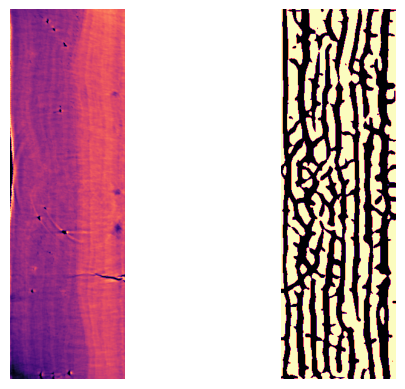

In [5]:
"""
Let's go with the Sato algorithm and narrow filter for now

"""
fig, axes = plt.subplots(1, 2)

sigma = 1.5
blur_sigma = 5
ridge_threshold = 3.0

image = np.load("cropped_image.npy")
image = filter.steerable_filter(image, theta=0, sigma=sigma)
image = filters.gaussian(image, sigma=blur_sigma)

ridges = filters.sato(image, sigmas=range(1, 5, 2))
is_ridge = ridges > ridge_threshold
image[is_ridge] = 0
image[~is_ridge] = 255

axes[0].imshow(np.load("cropped_image.npy"), cmap="magma")
axes[1].imshow(image, cmap="magma")
for axis in axes:
    axis.axis("off")

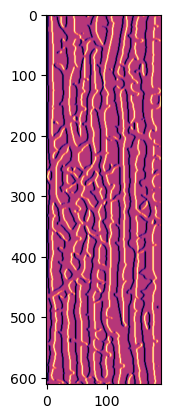

In [6]:
from skimage.filters import farid_v

fig, axis = plt.subplots()
axis.imshow(farid_v(image), cmap="magma")